# Visualization Processor
This part we try to get the wanted data from the dataset and, after basic calculation, visualize it.
1. Visualize stock prices (20 points)
2. Correlation coefficient calculation and heat map display (20 points)
3. Predict price changes and display them (10 points) (only includes "display")
   * For the reason that we try to use a small MLP to forecast the price-date relation, which is to complex to be contained in this part.


* 不要尝试纠正我的英语语法喵，怕尴尬的谢谢喵😋

```mermaid
graph LR
A[Build dictionary]-->B[Get wanted data 'SZ.xxxxxx YYYY-MM']-->C[Draw the k-line chart]-->D[Integrated k-line chart function]

#### import the necessary library

In [513]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

#### build the library of stock data

In [514]:

def build_dictionary(file_name):
    index_dict = {}
    with open(file_name, 'r') as index_file:
        for line in index_file:
            parts = line.strip().split(',')
            stock_code = parts[0]
            month = parts[1]
            offset = int(parts[2])
            if stock_code not in index_dict:
                index_dict[stock_code] = {}
            index_dict[stock_code][month] = offset
    # print(index_dict)
    return index_dict


#### get the data of a certain month for a certain stock

In [515]:
def get_stock_data_range(stock_code, month, index_dict, output_file_path):
    if stock_code in index_dict and month in index_dict[stock_code]:
        # print('Found stock code and month in index dictionary')
        offset = index_dict[stock_code][month]
        # print('Offset:', offset)
        with open(output_file_path, 'r') as output_file:
            # print('Reading data from file:', output_file_path)
            # 移动文件指针到指定偏移量
            output_file.seek(offset)
            # 读取并存储当前股票和月份的数据行
            data_lines = []
            while True:
                data_line = output_file.readline()
                # print(data_line)
                if not data_line:
                    break
                parts = data_line.strip().split(',')
                current_code = parts[0]
                current_date = parts[1]
                current_month = current_date[:7]

                # 如果遇到不同的股票代码或月份，则停止读取
                if current_code != stock_code or current_month != month:
                    # print('Different stock code or month:', current_code, current_month)
                    break

                data_lines.append(data_line.strip())
            # print(data_lines)
            return data_lines
    else:
        return None



In [516]:
# index_dict=build_dictionary('./Data_Frame/index.txt')
# a = get_stock_data_range('000001.SZ', '2000-12', index_dict, './Data_Frame/output.txt')


#### draw the k-line chart

In [517]:


def plot_k_line(stock_data, stock_code, month):
    # 处理数据，将字符串转换为DataFrame
    data = [line.split(',') for line in stock_data]
    columns = ['ts_code', 'trade_date', 'open', 'high', 'low', 'close', 'pre_close', 'change', 'pct_chg', 'vol', 'amount']
    df = pd.DataFrame(data, columns=columns)
    
    # 将字符串类型的数值列转换为浮点型
    df[['open', 'high', 'low', 'close', 'pre_close', 'change', 'pct_chg', 'vol', 'amount']] = df[['open', 'high', 'low', 'close', 'pre_close', 'change', 'pct_chg', 'vol', 'amount']].astype(float)
    
    # 将交易日期转换为datetime类型
    df['trade_date'] = pd.to_datetime(df['trade_date'])
    
    # 按照交易日期排序
    df = df.sort_values(by='trade_date')
    
    # 绘制K线图
    fig, ax = plt.subplots(figsize=(10, 6))

    # 绘制K线图
    for index, row in df.iterrows():
        color = 'green' if row['close'] >= row['open'] else 'red'
        ax.plot([row['trade_date'], row['trade_date']], [row['low'], row['high']], color='black')  # 画最高最低线
        ax.plot([row['trade_date'], row['trade_date']], [row['open'], row['close']], color=color, linewidth=5)  # 画开盘收盘线

    # 设置x轴为日期格式
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    plt.xticks(rotation=45)
    
    plt.title(f'K-Line Chart for {stock_code} in {month}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()



#### integrated k-line chart function

In [518]:
def integrated_k_line_chart(index_file_path, stock_code, month, output_file_path):    
    # 调用函数构建字典
    index_dict = build_dictionary('./Data_Frame/index.txt')

    stock_data_range = get_stock_data_range(stock_code, month, index_dict, output_file_path)
    # 调用函数绘制K线图
    plot_k_line(stock_data_range, stock_code, month)

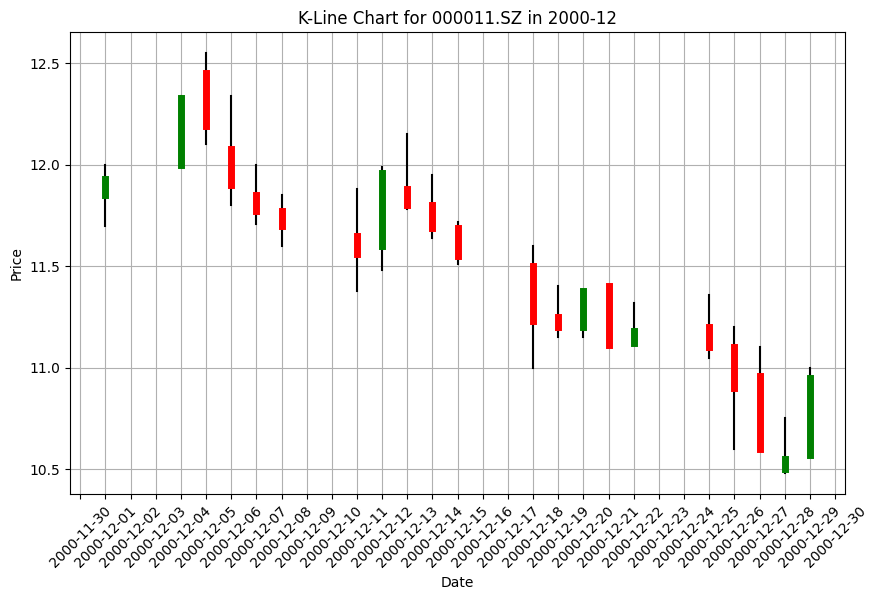

In [519]:
integrated_k_line_chart('./Data_Frame/index.txt', '000011.SZ', '2000-12', './Data_Frame/output.txt')

#### Get a series of data locations